In [2]:
from matchms.importing import load_from_mgf
dataset = list(load_from_mgf("/Users/rtlortega/Documents/PhD/Datasets/merged_and_cleaned_libraries_1.mgf"))
len(dataset)

1017531

FILTERING:
MS2 level = 1,017,531
Positive mode: 701,790
Corinna Brungs:  304,872

In [5]:
dataset[0].metadata

{'charge': 1,
 'description': 'ENAMMOL',
 'formula': 'C20H20FNO4',
 'inchi': 'InChI=1S/C20H20FNO4/c1-25-17-7-3-6-15-16-10-22(9-13-4-2-5-14(21)8-13)11-20(16,19(23)24)12-26-18(15)17/h2-8,16H,9-12H2,1H3,(H,23,24)/t16-,20-/m1/s1',
 'smiles': 'COc1cccc2c1OC[C@]1(C(=O)O)CN(Cc3cc(F)ccc3)C[C@H]21',
 'feature_id': '20240405_pluskal_enammol_5004_A22_id_MSn_positive.mzML msn trees:17',
 'adduct': '[M+Na]+',
 'feature_ms1_height': '4.404E7',
 'spectype': 'SAME_ENERGY',
 'collision_energy': '60.0',
 'fragmentation_method': 'HCD',
 'isolation_window': '1.2000000476839432',
 'acquisition': 'Commercial',
 'ims_type': 'none',
 'ion_source': 'ESI',
 'ionmode': 'positive',
 'dataset_id': 'MSV000094528',
 'usi': '[mzspec:MSV000094528:20240405_pluskal_enammol_5004_A22_id_MSn_positive:256, mzspec:MSV000094528:20240405_pluskal_enammol_5004_A22_id_MSn_positive:786]',
 'scans': '256,786',
 'precursor_purity': '1.0',
 'quality_chimeric': 'PASSED',
 'quality_explained_intensity': '0.96458876',
 'quality_explaine

In [13]:
from collections import Counter

ionisation = [spectrum.get("ionmode") for spectrum in dataset]
print(Counter(ionisation))

Counter({'positive': 702579, 'negative': 314952})


In [9]:
spec_filtered=[]
for spec in dataset:
    if spec.get("ms_level")=="2" and spec.get("ionmode")=="positive" and spec.get("smiles") is not None:
        spec_filtered.append(spec)

In [17]:
len(spec_filtered)

702579

In [43]:
mass_analyzer = [spectrum.get("ms_mass_analyzer") for spectrum in spec_filtered]
print(Counter(mass_analyzer))

Counter({'orbitrap': 398018, 'Orbitrap': 191308, 'qtof': 62379, 'ftms': 43597, 'quadrupole': 5068, 'ion trap': 1793, None: 379, 'tof': 37})


In [42]:
data_collector = [spectrum.get("data_collector") for spectrum in spec_filtered]
print(Counter(data_collector))

Counter({None: 511271, 'Corinna Brungs': 191308})


In [44]:
collision_energy = [spectrum.get("collision_energy") for spectrum in spec_filtered]
print(Counter(collision_energy))

Counter({None: 434645, '60.0': 71862, '20.0': 66166, '30.0': 40158, '45.0': 22522, '15.0': 16273, '35.0': 6201, '40.0': 5277, '6.0': 4804, '10.0': 4003, '90.0': 3331, '50.0': 2691, '75.0': 2574, '80.0': 1600, '120.0': 1471, '70.0': 1413, '150.0': 1305, '25.0': 1191, '33.0': 1027, '32.0': 985, '100.0': 949, '55.0': 924, '110.0': 859, '31.0': 834, '34.0': 830, '130.0': 799, '29.0': 787, '140.0': 757, '28.0': 602, '180.0': 543, '36.0': 517, '27.0': 445, '21.0': 407, '5.0': 368, '26.0': 328, '65.0': 304, '23.0': 243, '85.0': 202, '43.0': 195, '41.0': 194, '105.0': 185, '37.0': 181, '95.0': 163, '24.0': 125, '19.0': 120, '115.0': 116, '44.0': 104, '22.0': 103, '125.0': 92, '42.0': 79, '38.0': 78, '18.0': 78, '17.0': 69, '16.0': 66, '39.0': 60, '0.0': 44, '46.0': 42, '160.0': 27, '170.0': 21, '11.0': 21, '13.0': 20, '165.0': 18, '14.0': 18, '135.0': 17, '145.0': 17, '155.0': 17, '175.0': 17, '185.0': 16, '61.0': 16, '47.0': 14, '53.0': 11, '12.0': 10, '48.0': 6, '49.0': 5, '1.0': 3, '51.0': 

In [50]:
spec_filtered_more=[]
for spec in spec_filtered:
    if spec.get("data_collector")=="Corinna Brungs" and spec.get("collision_energy")=="60.0":
        spec_filtered_more.append(spec)
len(spec_filtered_more)

68077

In [58]:
adducts = [spectrum.get("adduct") for spectrum in spec_filtered_more]
print(Counter(adducts))

Counter({'[M+H]+': 63329, '[M-H2O+H]+': 1941, '[M+NH4]+': 1723, '[M+Na]+': 568, '[M]+': 291, '[M-2H2O+H]+': 205, '[M-H2O]+': 20})


In [61]:
collision_energy = [spectrum.get("collision_energy") for spectrum in spec_filtered_more]
print(Counter(collision_energy))

Counter({'60.0': 68077})


In [81]:
spec_filtered_more_adducts=[]
for spec in spec_filtered_more:
    if spec.get("adduct")=="[M+H]+":
        spec_filtered_more_adducts.append(spec)
len(spec_filtered_more_adducts)

63329

In [124]:
adducts_test = [spectrum.get("adduct") for spectrum in spec_filtered_more_adducts]
print(Counter(adducts_test))

Counter({'[M+H]+': 63329})


InChIKeys are intended to be unique identifiers for chemical substances

In [82]:
only_inchikeys = [spec.get("inchikey") for spec in spec_filtered_more_adducts]
print(len(only_inchikeys))

63329


In [83]:
from collections import defaultdict


duplicates = defaultdict(list)

# iterate over positions and numbers simultaneously
for i, number in enumerate(only_inchikeys):
    # accumulate positions to the same number
    duplicates[number].append(i)

result = {key: value for key, value in duplicates.items()}


In [84]:
result

{'NHWREWFNNXLTDT-UHFFFAOYSA-N': [0, 1],
 'ZWHHBRKAHNHHDN-UHFFFAOYSA-N': [2, 3],
 'DVUSXQGMZHRAPP-UHFFFAOYSA-N': [4, 5],
 'OHLKQPVOQXXCDW-UHFFFAOYSA-N': [6, 7],
 'DGUQEGBVTIEEKQ-UHFFFAOYSA-N': [8, 9],
 'BEYMWEGJHMFOTQ-UHFFFAOYSA-N': [10, 11],
 'GASOXLGVGBVWMG-UHFFFAOYSA-N': [12, 13],
 'RUBCFBMNVLVTNK-UHFFFAOYSA-N': [14, 15],
 'XVCFDYYHZJBEBW-UHFFFAOYSA-N': [16],
 'NGTJUDHSIVXGMU-UHFFFAOYSA-N': [17, 18],
 'IVFAZMHRJRGODH-UHFFFAOYSA-N': [19, 20],
 'IRZQDMYEJPNDEN-UHFFFAOYSA-N': [21],
 'QBYKMWUKHHLWDS-UHFFFAOYSA-N': [22],
 'CDULPPOISZOUTK-UHFFFAOYSA-N': [23],
 'NKHUCLYOABFQOJ-UHFFFAOYSA-N': [24, 25],
 'UEFKMJWKPVAVND-UHFFFAOYSA-N': [26, 27],
 'KKZFEWUJXRWGJS-UHFFFAOYSA-N': [28, 29],
 'TWIMAQLGJSZRPW-UHFFFAOYSA-N': [30, 31],
 'LJABIYWOOVOKRK-UHFFFAOYSA-N': [32, 33],
 'ZUYWDWYKNJLVOJ-UHFFFAOYSA-N': [34],
 'QCAFIHFRESDDIR-UHFFFAOYSA-N': [35],
 'AYKFTXZIWVTYQM-UHFFFAOYSA-N': [36, 37],
 'CQEIZYGGTNLXOM-UHFFFAOYSA-N': [38, 39],
 'CFGKWSDAMXTRHE-ONGXEEELSA-N': [40, 41],
 'LDTABXJEQXILGO-UHFFFAOYS

In [ ]:
index_list = []
for value in result.values():
    if len(value)>1:
        index_list.append(value)

In [99]:
len(index_list)

21673

In [145]:
from matchms.similarity import CosineGreedy
similarity_measure = CosineGreedy()
from matchms import calculate_scores
similarity_measure = CosineGreedy()

low_scores = []
for i in index_list:
    scores = calculate_scores(references=[spec_filtered_more_adducts[i[0]]], queries=[spec_filtered_more_adducts[i[1]]], similarity_function=similarity_measure)
    for (reference, query, score) in scores:
        if score[0]<=0.99:
            low_scores.append((i[0], i[1], score[0], score[1]))

In [146]:
len(low_scores)

2034

In [147]:
2034/63329

0.03211798702016454

[M+H]+ [M+H]+


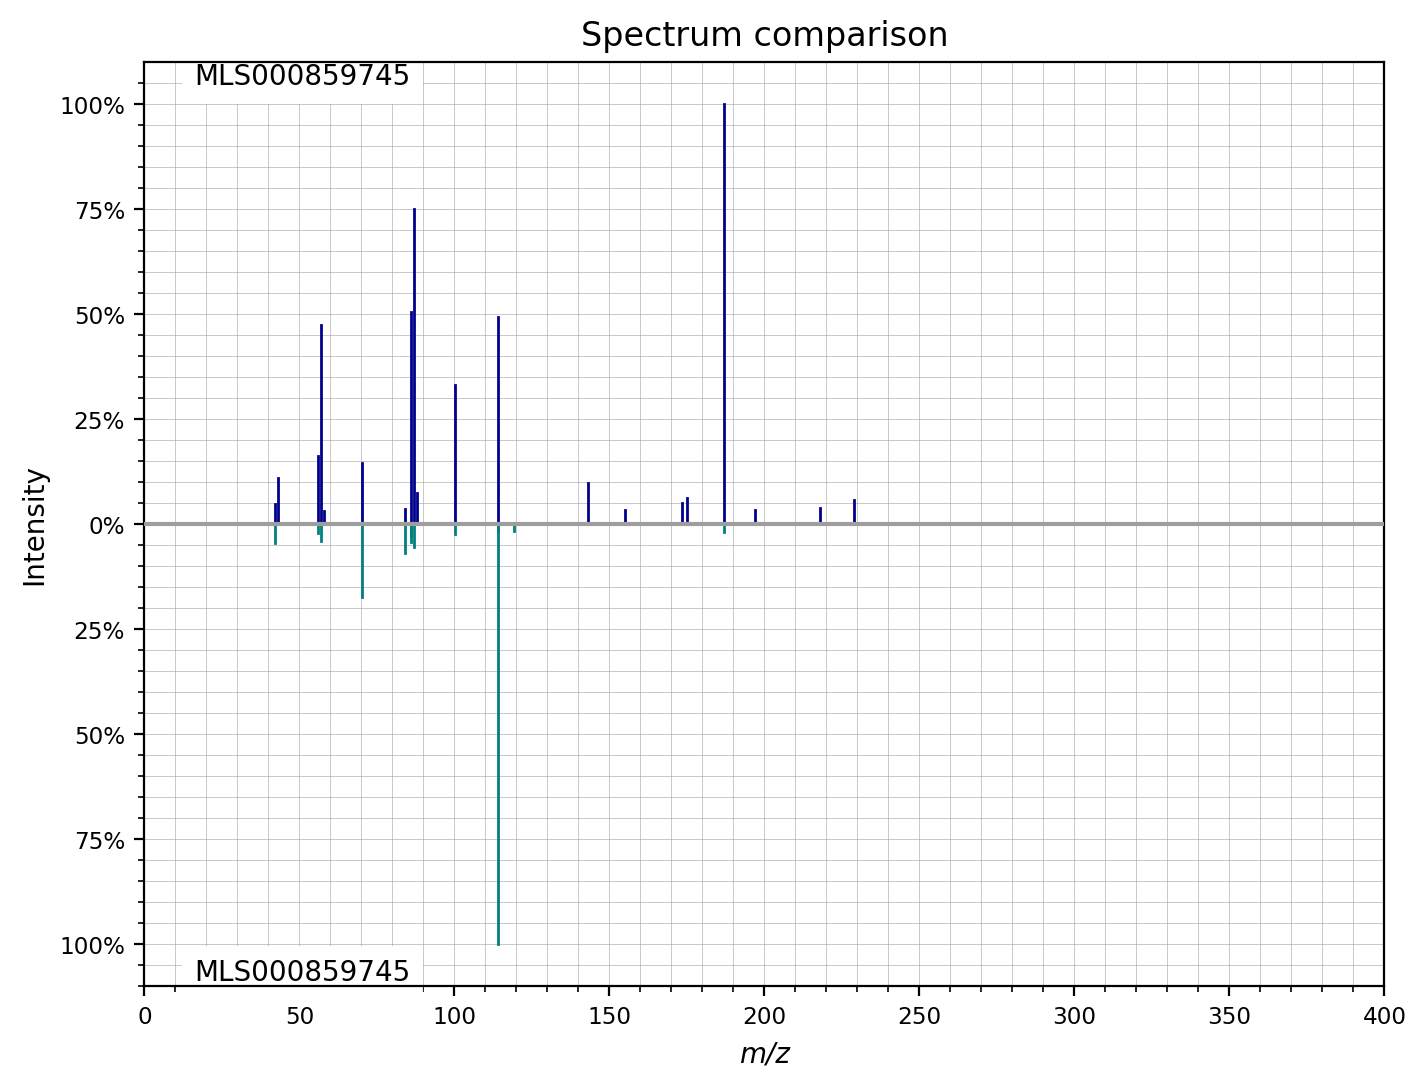

In [133]:
spec_filtered_more_adducts[15569].plot_against(spec_filtered_more_adducts[15570])
print(spec_filtered_more_adducts[15569].get("adduct"), spec_filtered_more_adducts[15570].get("adduct"))

In [131]:
spec_filtered_more[4601].metadata

{'charge': 1,
 'description': 'TMHTSNP',
 'formula': 'C27H30O15',
 'inchi': 'InChI=1S/C27H30O15/c1-9-17(31)20(34)22(36)26(39-9)38-8-15-18(32)21(35)23(37)27(41-15)42-25-19(33)16-13(30)6-12(29)7-14(16)40-24(25)10-2-4-11(28)5-3-10/h2-7,9,15,17-18,20-23,26-32,34-37H,8H2,1H3/t9-,15+,17-,18-,20+,21-,22+,23+,26+,27-/m0/s1',
 'smiles': 'C[C@@H]1O[C@@H](OC[C@H]2O[C@@H](Oc3c(-c4ccc(O)cc4)oc4cc(O)cc(O)c4c3=O)[C@H](O)[C@@H](O)[C@H]2O)[C@H](O)[C@H](O)[C@H]1O',
 'feature_id': '14',
 'featurelist_feature_id': '20241120_pluskal_targetmol_hts_np_5017_J18_id_MSn_positive.mzML msn trees:14',
 'adduct': '[M+H]+',
 'feature_ms1_height': '7.466E6',
 'spectype': 'SAME_ENERGY',
 'merged_across_n_samples': '1',
 'collision_energy': '60.0',
 'fragmentation_method': 'HCD',
 'isolation_window': '1.2000000476839432',
 'acquisition': 'Commercial',
 'ims_type': 'none',
 'ion_source': 'ESI',
 'ionmode': 'positive',
 'dataset_id': 'MSV000094528',
 'usi': 'mzspec:MSV000094528:20250228_targetmol_hts_np_pos_ms2:1370',
 '

In [135]:
(89/68000)*100

0.13088235294117645